NIT6004 Project 1: Neural Network and Deep Learning

ARITHA MINDULA JAYARATNE
S4683873

***TASK 1: Import the neccessary libraries.***

In [1]:
import tensorflow as tf  # Import TensorFlow for building and training the model
import matplotlib.pyplot as plt  # Import Matplotlib for visualizing the results


***TASK 2: Import the dataset MINSIT dataset and verify the data ***

In [2]:
# Load the MNIST dataset using Keras API
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Pre-process the dataset by scaling the pixel values to range from 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Verify if the MNIST Digit data is in correct format for the model.

# Check the shape of the datasets
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

# Check the data types
print("Train images dtype:", train_images.dtype)
print("Train labels dtype:", train_labels.dtype)

# Check the range of pixel values
print("Pixel value range in train images:", train_images.min(), "to", train_images.max())

# Check a sample of labels to ensure they are in the correct format
print("Sample labels:", train_labels[:10])


11490434/11490434 [==============================] - 1s 0us/step
Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)
Train images dtype: float64
Train labels dtype: uint8
Pixel value range in train images: 0.0 to 1.0
Sample labels: [5 0 4 1 9 2 1 3 1 4]


**TASK 3: Build the classifier using MLP. **

In [3]:
# Build the classifier model using MLP (Multi-Layer Perceptron)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Input layer: flattens the 28x28 image to a 784 vector
    tf.keras.layers.Dense(256, activation='relu'),  # First hidden layer with 256 neurons and ReLU activation
    tf.keras.layers.Dropout(0.2),  # Dropout layer for regularization
    tf.keras.layers.Dense(128, activation='relu'),  # Second hidden layer with 128 neurons and ReLU activation
    tf.keras.layers.Dropout(0.2),  # Dropout layer for regularization
    tf.keras.layers.Dense(64, activation='relu'),  # Third hidden layer with 64 neurons and ReLU activation
    tf.keras.layers.Dense(10, activation='softmax')  # Output layer with 10 neurons (one for each class) and softmax activation
])

# Summary of the model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                6

TASK 4: Compile the MLP model.

In [4]:
# Compile the model with the required parameters
model.compile(
    optimizer='adam',  # Optimizer
    loss='sparse_categorical_crossentropy',  # Loss function
    metrics=['accuracy']  # Metrics to monitor the MLP model
)


TASK 5: Train and test the MLP model.

In [10]:
# Train the model
history = model.fit(
    train_images, train_labels,
    epochs=15,  # Number of epochs
    batch_size=32,  # Batch size
    validation_split=0.2  # Use 20% of the data for validation
)

Epoch 1/15
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0362 - accuracy: 0.9886 - val_loss: 0.0871 - val_accuracy: 0.9793
Epoch 2/15
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0333 - accuracy: 0.9896 - val_loss: 0.0868 - val_accuracy: 0.9793
Epoch 3/15
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0327 - accuracy: 0.9898 - val_loss: 0.0897 - val_accuracy: 0.9789
Epoch 4/15
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0313 - accuracy: 0.9904 - val_loss: 0.0832 - val_accuracy: 0.9796
Epoch 5/15
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0296 - accuracy: 0.9905 - val_loss: 0.0829 - val_accuracy: 0.9811
Epoch 6/15
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0262 - accuracy: 0.9917 - val_loss: 0.0951 - val_accuracy: 0.9789
Epoch 7/15
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0278 - accuracy: 0.9912 - val_loss: 0.0946 - val_acc

In [11]:
# Make predictions on the test set
test_predictions = model.predict(test_images)
predicted_labels = tf.argmax(test_predictions, axis=1)


# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 [==============================] - 1s 2ms/step - loss: 0.0941 - accuracy: 0.9798
Test Accuracy: 97.98%


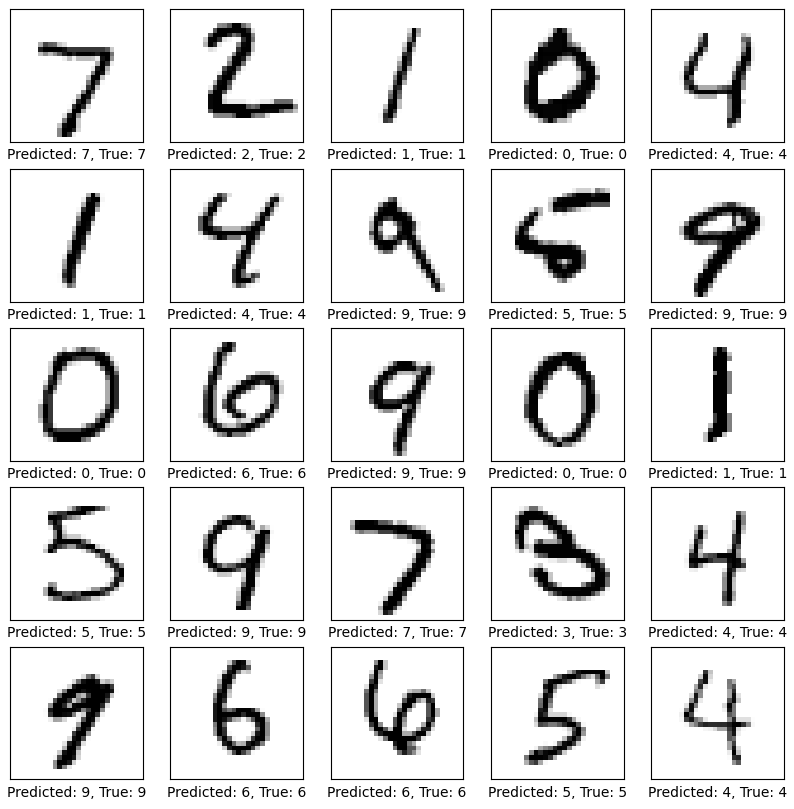

In [12]:
# Display some test images along with predicted and true labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(f"Predicted: {predicted_labels[i]}, True: {test_labels[i]}")
plt.show()

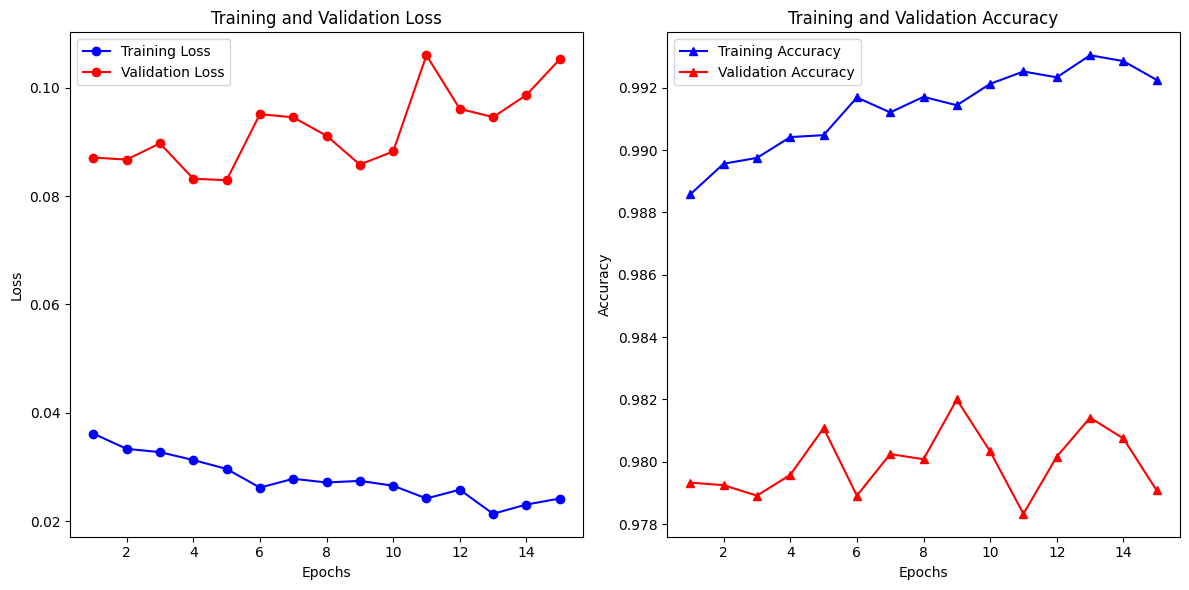

In [13]:
# Extracting loss and accuracy data from the history object
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Setting up the epochs range
epochs = range(1, len(loss) + 1)

# Creating subplots for loss and accuracy
plt.figure(figsize=(12, 6))

# Plotting training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'b^-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r^-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Displaying the plot
plt.tight_layout()
plt.show()
